# QCTO - Workplace Module

### Project Title: Insurance Claims Capstone Project
#### Done By: Kennety Mashishi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data, Data Collection and Pre-processing</a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

**Problem:**
Insurance fraud is a big problem in our market. It's costing the industry billions of dollars every year. We need to find a way to identify fraudulent claims before they cause significant financial damage.

**Why it matters:**
1. Financial: $45 billion market with only 1% insured catastrophe coverage  
2. Risk: High unemployment (30%) and low market penetration (<50%)
3. Knowledge Gap: Many customers don't understand insurance value

**Core Challenges:**
1. Affordability ($25/day cost, 10x higher than other countries)
2. Insurance Knowledge (education gap)
3. Target Marketing (reaching right customers)

**Solution Goal:**  
Build ML model to accurately flag potentially fraudulent claims to:
- Reduce financial losses
- Protect legitimate customers
- Improve risk assessment
---

# Links

Trello   :  https://trello.com/invite/b/679140bed881bbff1ce54c0b/ATTI38ce3245f326861aab900632d87233baA6F99368/explore-ai-capstone-project

Git Repo :  https://github.com/KennyM28/Explore_AI-KS_Mashishi-Capstone.git

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Loading Data, Data Collection and Pre-processing**
<a href=#cont>Back to Table of Contents</a>
---

In [2]:
df = pd.read_csv("insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
print(df.dtypes)


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
print("Total columns:", len(df.columns))                            

Total columns: 40


In [6]:
print(df.shape)


(1000, 40)


## Descriptive Statistics and Data Analysis Processes

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To transform raw insurance claims data into a clean, reliable dataset suitable for fraud detection analysis by implementing systematic data quality improvements and relevant filtering mechanisms.
* **Details:** Handle Missing Values, Outlier Treatment, Check Duplicates, Error Correction, Data Reduction, Remove redundant features
---

### Missing Values

In [7]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

print("\nNull Percentages:")
for col, percentage in null_percentages.items():
    print(f"{col}: {percentage:.2f}%")


Null Percentages:
months_as_customer: 0.00%
age: 0.00%
policy_number: 0.00%
policy_bind_date: 0.00%
policy_state: 0.00%
policy_csl: 0.00%
policy_deductable: 0.00%
policy_annual_premium: 0.00%
umbrella_limit: 0.00%
insured_zip: 0.00%
insured_sex: 0.00%
insured_education_level: 0.00%
insured_occupation: 0.00%
insured_hobbies: 0.00%
insured_relationship: 0.00%
capital-gains: 0.00%
capital-loss: 0.00%
incident_date: 0.00%
incident_type: 0.00%
collision_type: 0.00%
incident_severity: 0.00%
authorities_contacted: 9.10%
incident_state: 0.00%
incident_city: 0.00%
incident_location: 0.00%
incident_hour_of_the_day: 0.00%
number_of_vehicles_involved: 0.00%
property_damage: 0.00%
bodily_injuries: 0.00%
witnesses: 0.00%
police_report_available: 0.00%
total_claim_amount: 0.00%
injury_claim: 0.00%
property_claim: 0.00%
vehicle_claim: 0.00%
auto_make: 0.00%
auto_model: 0.00%
auto_year: 0.00%
fraud_reported: 0.00%
_c39: 100.00%


In [8]:
ins_df = df.drop("_c39", axis = 1) 

In [9]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [10]:
ins_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
summary_stats = ins_df.describe(percentiles=[0.25, 0.5, 0.75])
print(summary_stats)

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

In [12]:
def calculate_five_number_summary(df):
    """
    Calculate five number summary for numerical columns in the dataset
    """
    # Numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate summary statistics
    summary = df[numeric_cols].agg([
        'min',
        lambda x: x.quantile(0.25),
        'median',
        lambda x: x.quantile(0.75),
        'max'
    ]).round(2)
    
    summary.index = ['Min', 'Q1', 'Median', 'Q3', 'Max']
    
    return summary

In [13]:

data_summary = calculate_five_number_summary(ins_df)
print("\nFive Number Summary:")
print(data_summary)


Five Number Summary:
        months_as_customer   age  policy_number  policy_deductable  \
Min                   0.00  19.0      100804.00              500.0   
Q1                  115.75  32.0      335980.25              500.0   
Median              199.50  38.0      533135.00             1000.0   
Q3                  276.25  44.0      759099.75             2000.0   
Max                 479.00  64.0      999435.00             2000.0   

        policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
Min                    433.33      -1000000.0     430104.0            0.0   
Q1                    1089.61             0.0     448404.5            0.0   
Median                1257.20             0.0     466445.5            0.0   
Q3                    1415.70             0.0     603251.0        51025.0   
Max                   2047.59      10000000.0     620962.0       100500.0   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
Min        -111

In [14]:
print(ins_df.isnull().sum())

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [15]:
mode_value = ins_df['authorities_contacted'].mode()[0]
print(f"Mode value: {mode_value}")
# ins_df.fillna(ins_df.mean(), inplace=True) 


Mode value: Police


In [16]:
ins_df['authorities_contacted'] = ins_df['authorities_contacted'].fillna(mode_value)

In [17]:
# Standardize text data
for col in ins_df.select_dtypes(['object']):
   ins_df[col] = ins_df[col].str.strip().str.lower()


In [18]:
# Check for duplicate rows
print("Duplicate rows:", ins_df.duplicated().sum())


Duplicate rows: 0


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships. Discover hidden patterns, anomalies, and relationships within insurance claims data to identify potential indicators of fraudulent behavior.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings. Generate summary statistics. Create visualizations showing distribution of claims across different categories. Plot correlations between numerical variables
---


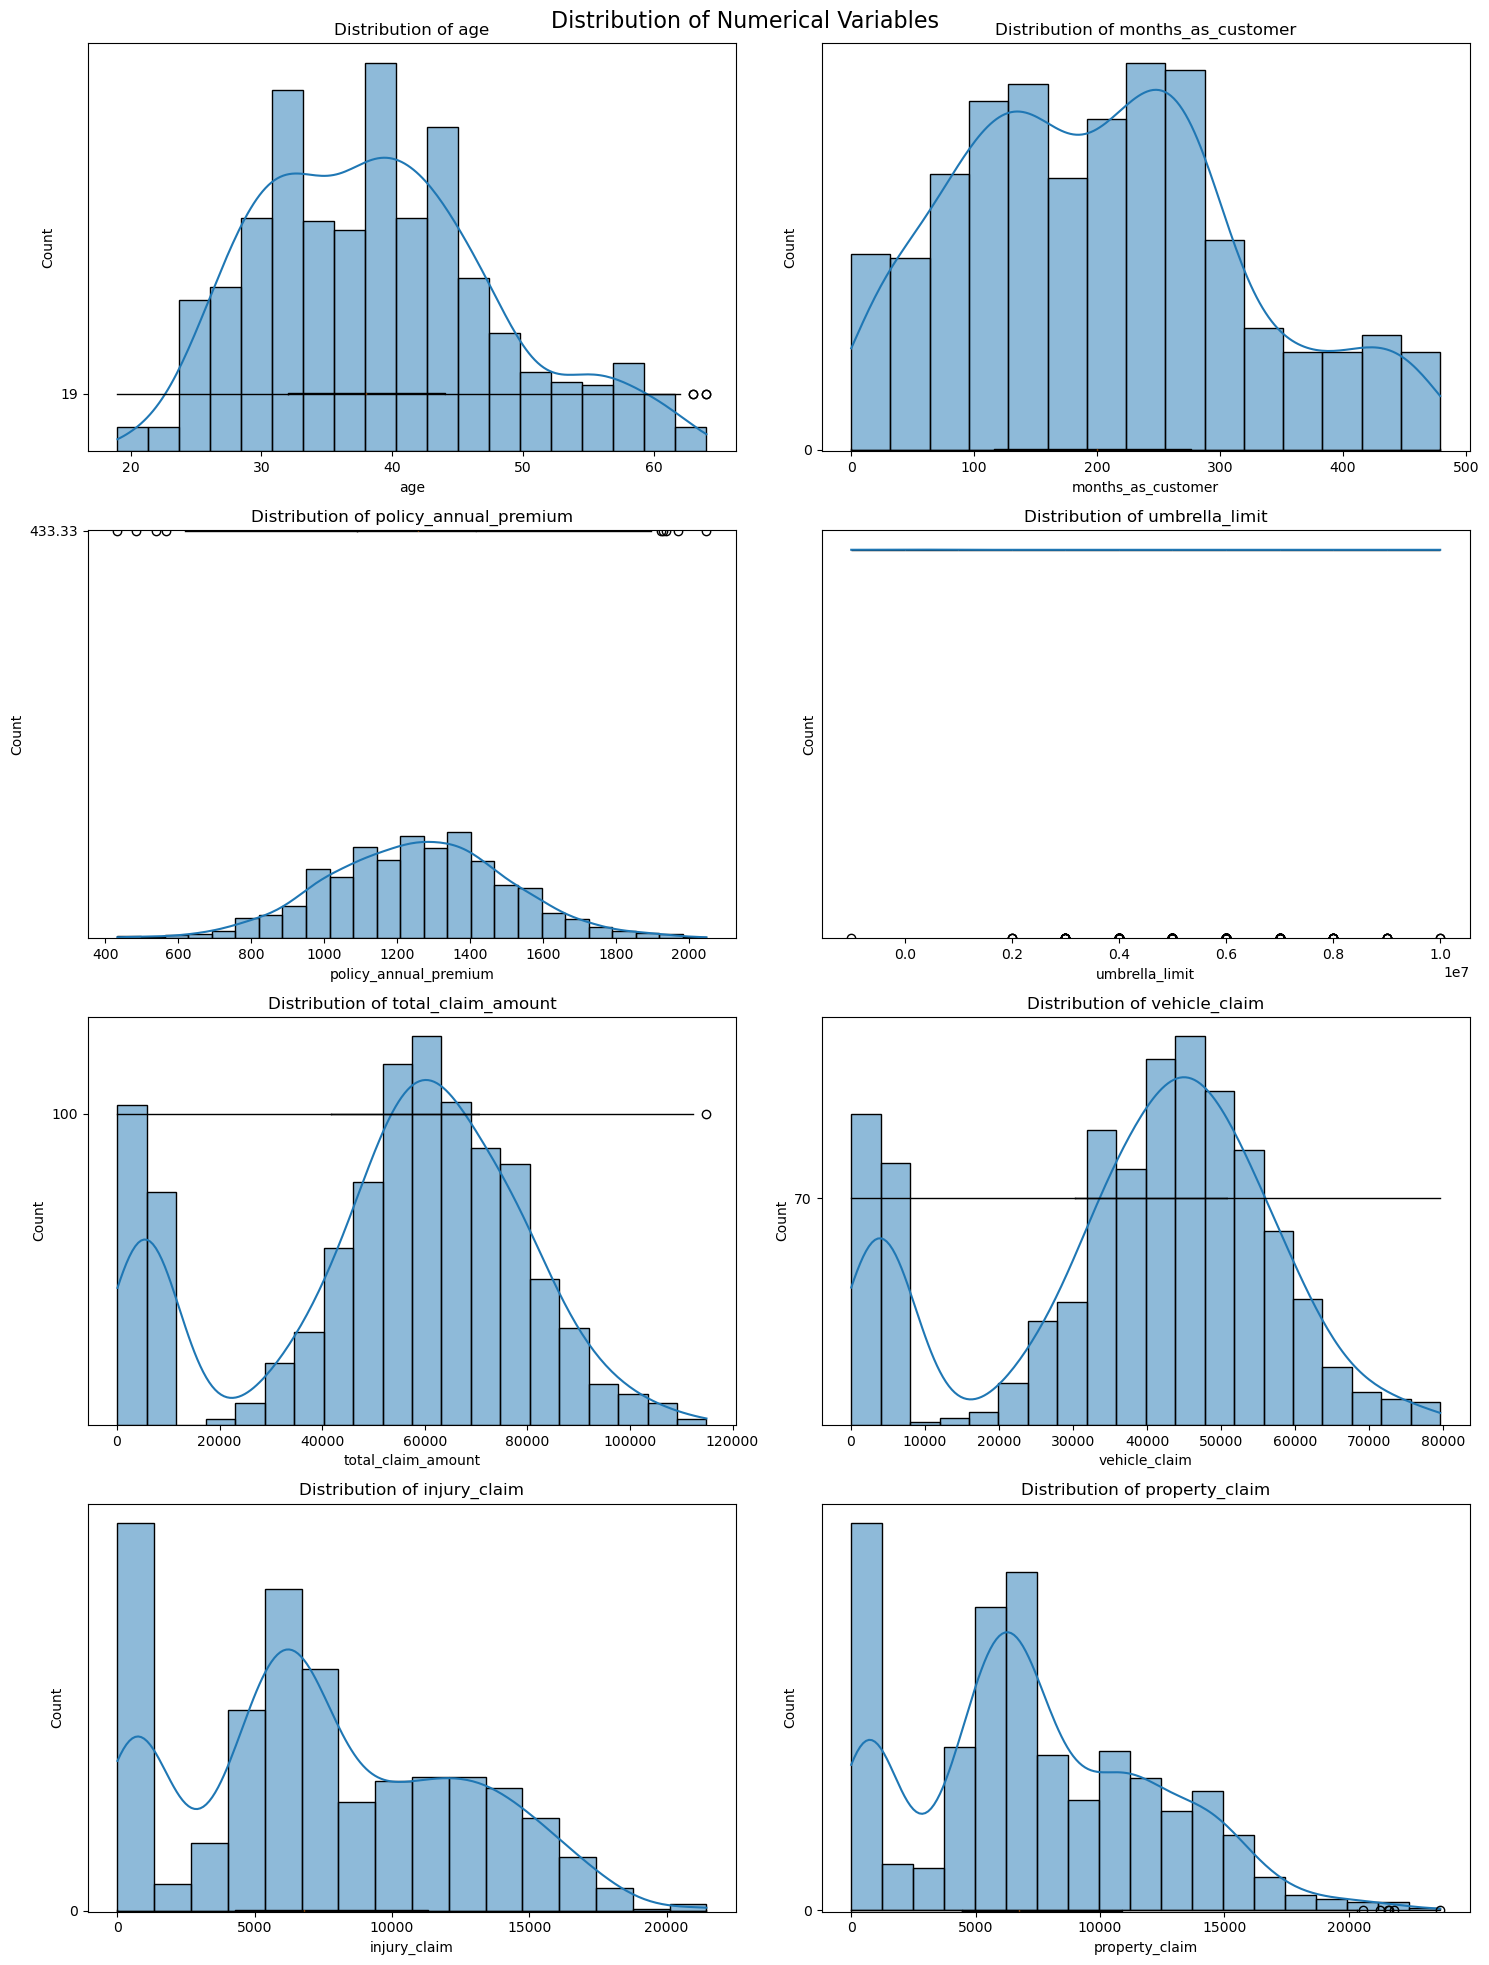

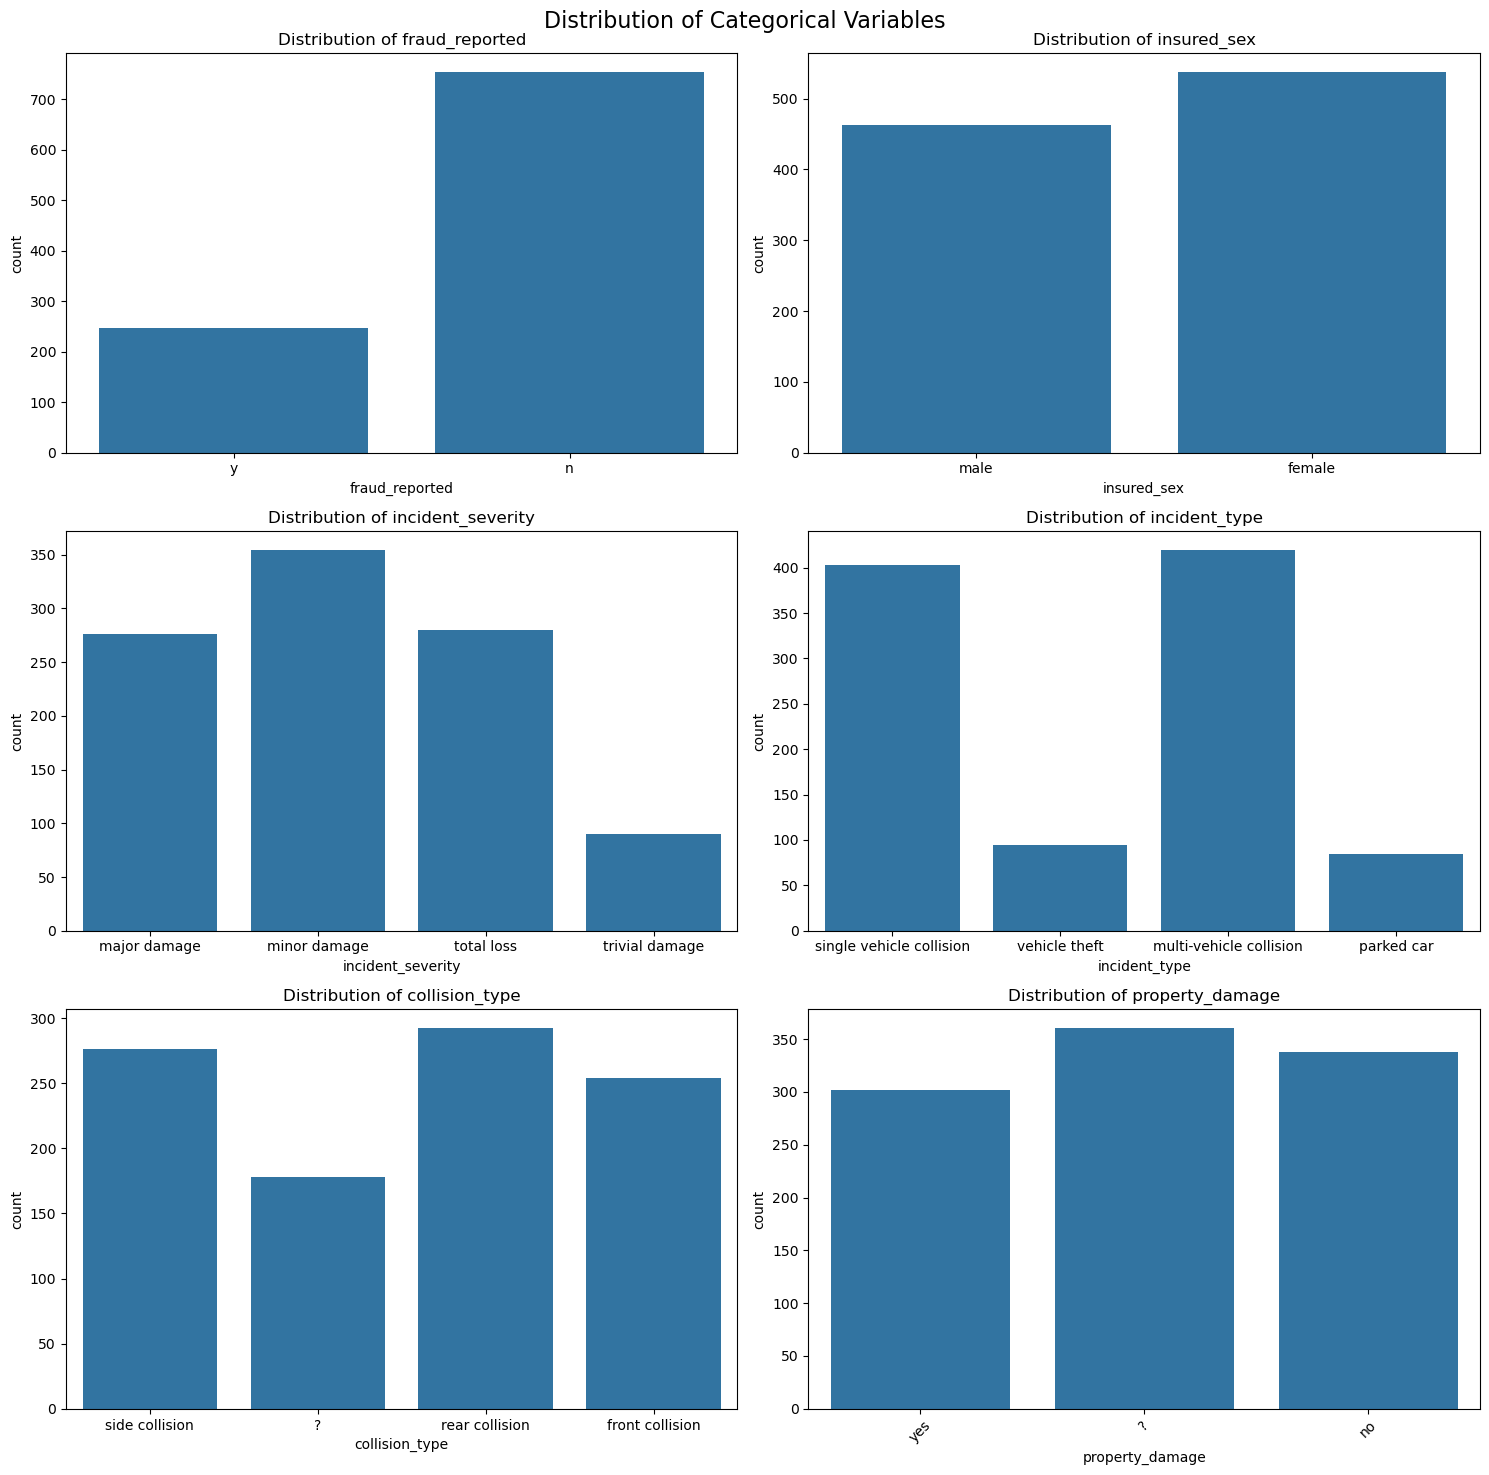

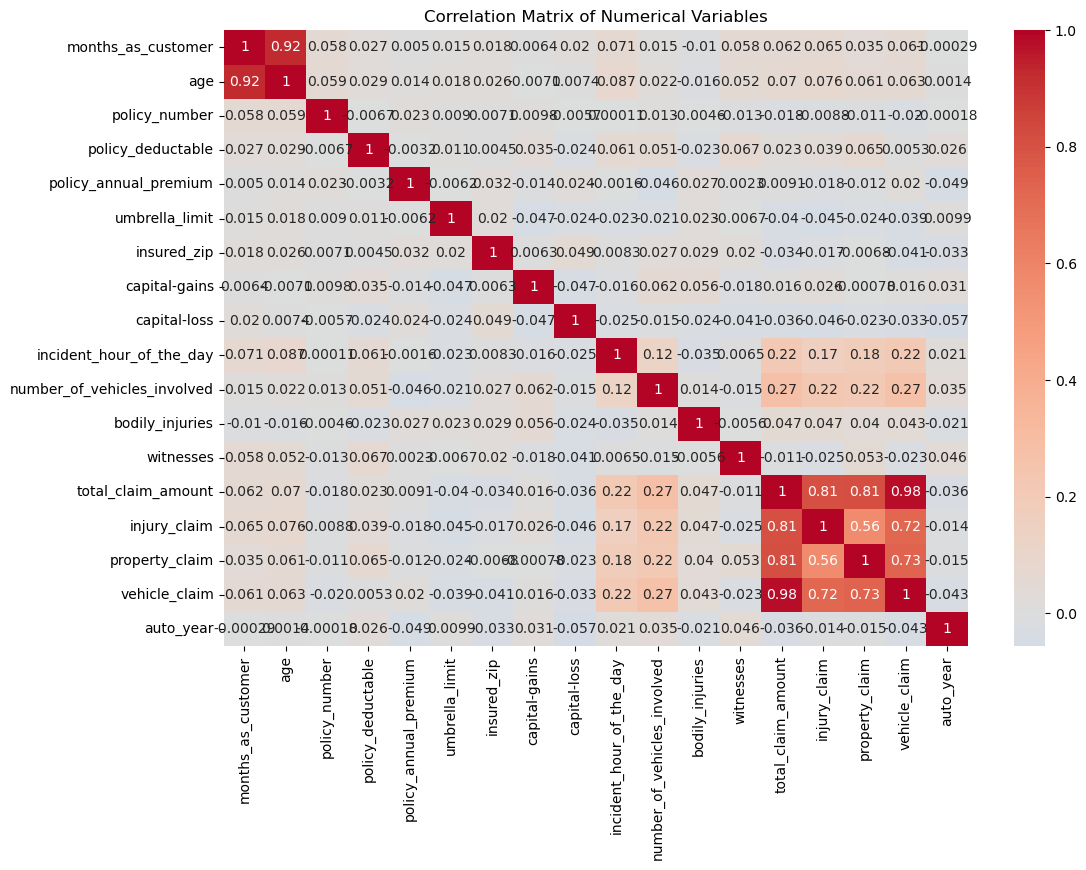

In [19]:


def plot_data_distributions(df):
   # Set up the figure layout
   numerical_cols = ['age', 'months_as_customer', 'policy_annual_premium', 'umbrella_limit', 
                    'total_claim_amount', 'vehicle_claim', 'injury_claim', 'property_claim']
   
   fig, axes = plt.subplots(4, 2, figsize=(15, 20))
   fig.suptitle('Distribution of Numerical Variables', fontsize=16)
   
   # Plotting
   for i, col in enumerate(numerical_cols):
       row = i // 2
       col_idx = i % 2
       
       # Histogram
       sns.histplot(data=df, x=col, ax=axes[row, col_idx], kde=True)
       axes[row, col_idx].set_title(f'Distribution of {col}')
       
       # Boxplot
       axes[row, col_idx].boxplot(df[col], vert=False, positions=[df[col].min()])
       
   plt.tight_layout()
   plt.show()

def plot_missing_values(df):
   # Missing values
   missing = df.isnull().sum()
   missing = missing[missing > 0]
   
   # Plotting
   plt.figure(figsize=(10, 6))
   plt.bar(range(len(missing)), missing.values)
   plt.title('Missing Values by Column')
   plt.xticks(range(len(missing)), missing.index, rotation=45)
   plt.ylabel('Count of Missing Values')
   plt.show()

def plot_categorical_distributions(df):
   categorical_cols = ['fraud_reported', 'insured_sex', 'incident_severity', 
                      'incident_type', 'collision_type', 'property_damage']
   
   fig, axes = plt.subplots(3, 2, figsize=(15, 15))
   fig.suptitle('Distribution of Categorical Variables', fontsize=16)
   
   for i, col in enumerate(categorical_cols):
       row = i // 2
       col_idx = i % 2
       
       sns.countplot(data=df, x=col, ax=axes[row, col_idx])
       axes[row, col_idx].set_title(f'Distribution of {col}')
       plt.xticks(rotation=45)
       
   plt.tight_layout()
   plt.show()

def plot_correlation_matrix(df):
   # Numerical columns
   numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
   
   # Calculate correlations
   corr = df[numerical_cols].corr()
   
   # Plotting
   plt.figure(figsize=(12, 8))
   sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
   plt.title('Correlation Matrix of Numerical Variables')
   plt.show()

# Execute all visualizations
plot_data_distributions(ins_df)
plot_categorical_distributions(ins_df) 
plot_correlation_matrix(ins_df)

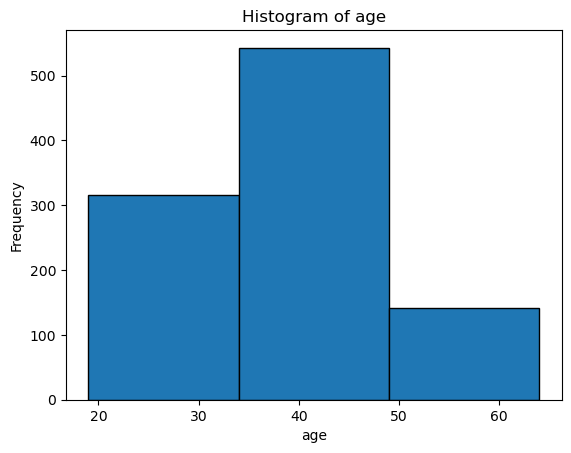

In [20]:
# Column
age = 'age'

# Plot the histogram
plt.hist(ins_df[age], bins=3, edgecolor='black')

plt.xlabel(age)
plt.ylabel('Frequency')
plt.title(f'Histogram of {age}')

# Display the histogram
plt.show()

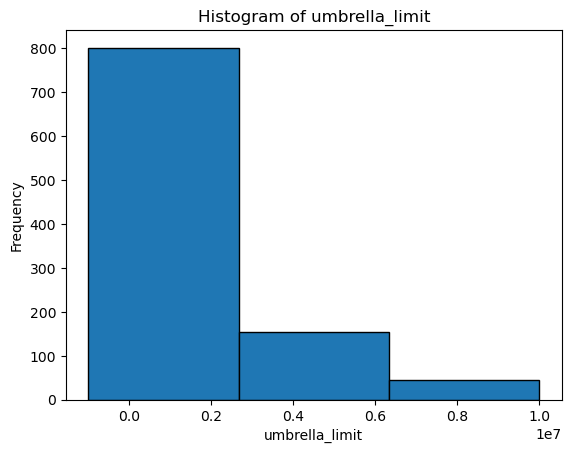

In [21]:
# Column
umbrella_limit = 'umbrella_limit'

# Plot the histogram
plt.hist(ins_df[umbrella_limit], bins=3, edgecolor='black')

plt.xlabel(umbrella_limit)
plt.ylabel('Frequency')
plt.title(f'Histogram of {umbrella_limit}')

# Display the histogram
plt.show()

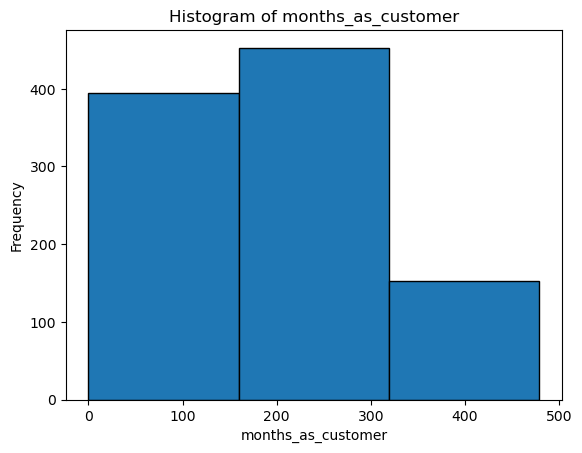

In [22]:
# Column
months_as_customer = 'months_as_customer'

# Plot the histogram
plt.hist(ins_df[months_as_customer], bins=3, edgecolor='black')

plt.xlabel(months_as_customer)
plt.ylabel('Frequency')
plt.title(f'Histogram of {months_as_customer}')

# Display the histogram
plt.show()

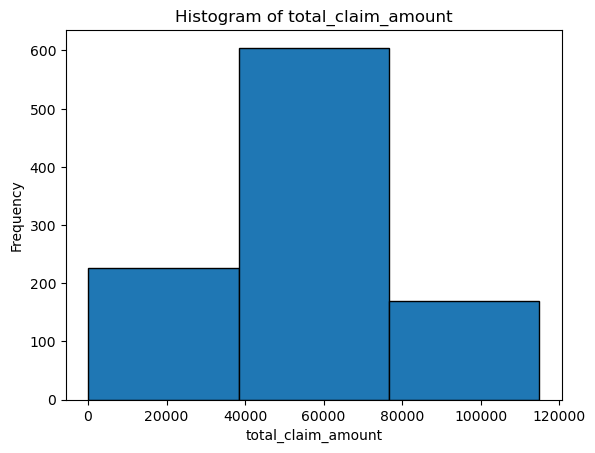

In [23]:
# Column
total_claim_amount = 'total_claim_amount'

# Plot the histogram
plt.hist(ins_df[total_claim_amount], bins=3, edgecolor='black')

plt.xlabel(total_claim_amount)
plt.ylabel('Frequency')
plt.title(f'Histogram of {total_claim_amount}')

# Display the histogram
plt.show()

In [24]:
bin_edges = [0, 30, 55, 100]  # Bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
ins_df['ages_category'] = pd.cut(ins_df['age'], bins=bin_edges, labels=bin_labels)

In [25]:
ins_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,yes,71610,6510,13020,52080,saab,92x,2004,y,Middle Aged
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,mercedes,e400,2007,y,Middle Aged
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,no,34650,7700,3850,23100,dodge,ram,2007,n,Young Adult
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,no,63400,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,no,6500,1300,650,4550,accura,rsx,2009,n,Middle Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,oh,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,honda,accord,2006,n,Middle Aged
996,285,41,186934,2014-01-05,il,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,volkswagen,passat,2015,n,Middle Aged
997,130,34,918516,2003-02-17,oh,250/500,500,1383.49,3000000,442797,...,yes,67500,7500,7500,52500,suburu,impreza,1996,n,Middle Aged
998,458,62,533940,2011-11-18,il,500/1000,2000,1356.92,5000000,441714,...,yes,46980,5220,5220,36540,audi,a5,1998,n,Elderly


In [26]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
ins_df['customer_category'] = pd.cut(ins_df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [27]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,saab,92x,2004,y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,mercedes,e400,2007,y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,dodge,ram,2007,n,Young Adult,Established Client
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,accura,rsx,2009,n,Middle Aged,Long-Term Client


## Creating New Features

In [28]:
ins_df["Contract Years"] = ins_df["months_as_customer"]/12

In [29]:
ins_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,oh,250/500,1000,1406.91,0,466132,...,6510,13020,52080,saab,92x,2004,y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,in,250/500,2000,1197.22,5000000,468176,...,780,780,3510,mercedes,e400,2007,y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,oh,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,dodge,ram,2007,n,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,il,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,chevrolet,tahoe,2014,y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,il,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,accura,rsx,2009,n,Middle Aged,Long-Term Client,19.000000


In [30]:

from sklearn.preprocessing import LabelEncoder

def create_engineered_features(df):
    df_new = df.copy()
    
    # Time-Based Features
    df_new['policy_bind_date'] = pd.to_datetime(df_new['policy_bind_date'])
    df_new['incident_date'] = pd.to_datetime(df_new['incident_date'])
    
    df_new['policy_duration'] = (df_new['incident_date'] - df_new['policy_bind_date']).dt.days
    df_new['incident_hour_category'] = pd.cut(df_new['incident_hour_of_the_day'], 
                                            bins=[0,6,12,18,24], 
                                            labels=['Night','Morning','Afternoon','Evening'])
    df_new['weekend_incident'] = df_new['incident_date'].dt.dayofweek.isin([5,6]).astype(int)

    # Vehicle Features
    df_new['vehicle_age'] = datetime.now().year - df_new['auto_year']
    df_new['is_luxury_vehicle'] = df_new['auto_make'].isin(['Mercedes', 'BMW', 'Audi', 'Lexus']).astype(int)
    
    # Risk Score Features
    df_new['risk_score'] = (
        (df_new['vehicle_age'] * 0.2) +
        (df_new['number_of_vehicles_involved'] * 0.3) +
        (df_new['witnesses'].fillna(0) * 0.1) +
        (df_new['bodily_injuries'].fillna(0) * 0.4)
    )
    
    # Financial Features
    df_new['premium_per_thousand'] = df_new['policy_annual_premium'] / (df_new['policy_deductable']/1000)
    df_new['claim_per_premium'] = df_new['total_claim_amount'] / df_new['policy_annual_premium']
    df_new['umbrella_coverage_ratio'] = df_new['umbrella_limit'] / df_new['policy_annual_premium']
    
    # Claims Breakdown Features
    total_claim = df_new['total_claim_amount']
    df_new['injury_claim_pct'] = df_new['injury_claim'] / total_claim
    df_new['property_claim_pct'] = df_new['property_claim'] / total_claim
    df_new['vehicle_claim_pct'] = df_new['vehicle_claim'] / total_claim
    
    # Customer Profile Features
    df_new['high_risk_hobby'] = df_new['insured_hobbies'].isin(
        ['skydiving', 'bungie-jumping', 'base-jumping', 'paintball']
    ).astype(int)
    
    df_new['high_education'] = df_new['insured_education_level'].isin(
        ['PhD', 'Masters', 'MD', 'JD']
    ).astype(int)
    
    # Incident Severity Features
    severity_map = {
        'Minor Damage': 1,
        'Major Damage': 2,
        'Total Loss': 3,
        'Trivial Damage': 0
    }
    df_new['incident_severity_score'] = df_new['incident_severity'].map(severity_map)
    
    # Location Based Features
    df_new['same_state_accident'] = (df_new['policy_state'] == df_new['incident_state']).astype(int)
    
    # Composite Features
    df_new['claims_risk_score'] = (
        df_new['total_claim_amount'] * 
        df_new['incident_severity_score'] * 
        df_new['number_of_vehicles_involved']
    )
    
    # Age-based Features
    df_new['age_group'] = pd.cut(df_new['age'], 
                                bins=[0,25,35,45,55,100], 
                                labels=['Young','Adult','Middle','Senior','Elder'])
    
    # Binary Flags
    df_new['has_umbrella'] = (df_new['umbrella_limit'] > 0).astype(int)
    df_new['has_property_damage'] = (df_new['property_damage'] == 'YES').astype(int)
    df_new['has_police_report'] = (df_new['police_report_available'] == 'YES').astype(int)
    
    # Customer Value Features
    df_new['customer_value_score'] = (
        (df_new['months_as_customer'] * 0.3) + 
        (df_new['policy_annual_premium'] * 0.4) +
        (df_new['umbrella_limit'] * 0.3)
    ) / 1000

    return df_new


In [31]:
from datetime import datetime

engineered_df = create_engineered_features(ins_df)

# Print new features
new_features = [col for col in engineered_df.columns if col not in ins_df.columns]
print("New engineered features:", new_features)

New engineered features: ['policy_duration', 'incident_hour_category', 'weekend_incident', 'vehicle_age', 'is_luxury_vehicle', 'risk_score', 'premium_per_thousand', 'claim_per_premium', 'umbrella_coverage_ratio', 'injury_claim_pct', 'property_claim_pct', 'vehicle_claim_pct', 'high_risk_hobby', 'high_education', 'incident_severity_score', 'same_state_accident', 'claims_risk_score', 'age_group', 'has_umbrella', 'has_property_damage', 'has_police_report', 'customer_value_score']


In [32]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = [
    'policy_state', 'insured_sex', 'insured_education_level', 
    'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'incident_city',
    'property_damage', 'police_report_available', 'auto_make', 'auto_model'
]

encoded_df = engineered_df.copy()
for col in categorical_cols:
    encoded_df[f'{col}_encoded'] = le.fit_transform(encoded_df[col].astype(str))

# Select features for final dataset
features_to_keep = [
    # Original numerical features
    'age', 'months_as_customer', 'policy_annual_premium', 'umbrella_limit',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
    'injury_claim', 'property_claim', 'vehicle_claim', 'total_claim_amount',
    
    # Encoded categorical features
    'policy_state_encoded', 'insured_sex_encoded', 'insured_education_level_encoded',
    'insured_occupation_encoded', 'insured_hobbies_encoded', 'incident_type_encoded',
    'collision_type_encoded', 'incident_severity_encoded', 'authorities_contacted_encoded',
    'auto_make_encoded', 'auto_model_encoded',
    
    # Engineered features
    'policy_duration', 'vehicle_age', 'is_luxury_vehicle', 'risk_score',
    'premium_per_thousand', 'claim_per_premium', 'umbrella_coverage_ratio',
    'injury_claim_pct', 'property_claim_pct', 'vehicle_claim_pct',
    'high_risk_hobby', 'high_education', 'incident_severity_score',
    'same_state_accident', 'claims_risk_score', 'customer_value_score',
    'has_umbrella', 'has_property_damage', 'has_police_report',
    'weekend_incident'
]


final_df = encoded_df[features_to_keep].copy()

# Prospective target variable
final_df['fraud_reported'] = (df['fraud_reported'] == 'Y').astype(int)

In [33]:
def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    # Fill numerical missing values with median
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Fill categorical missing values with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

In [34]:

final_df = handle_missing_values(final_df)

In [35]:
final_df

,age,months_as_customer,policy_annual_premium,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,...,high_education,incident_severity_score,same_state_accident,claims_risk_score,customer_value_score,has_umbrella,has_property_damage,has_police_report,weekend_incident,fraud_reported
0,48,328,1406.91,0,1,1,2,6510,13020,52080,...,0,NaN,0,NaN,0.661164,0,0,0,1,1
1,42,228,1197.22,5000000,1,0,0,780,780,3510,...,0,NaN,0,NaN,1500.547288,1,0,0,0,1
2,29,134,1413.14,5000000,3,2,3,7700,3850,23100,...,0,NaN,0,NaN,1500.605456,1,0,0,1,0
3,41,256,1415.74,6000000,1,1,2,6340,6340,50720,...,0,NaN,0,NaN,1800.643096,1,0,0,1,1
4,44,228,1583.91,6000000,1,0,1,1300,650,4550,...,0,NaN,0,NaN,1800.701964,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,3,1310.80,0,1,0,1,17440,8720,61040,...,0,NaN,0,NaN,0.525220,0,0,0,1,0
996,41,285,1436.79,0,1,2,3,18080,18080,72320,...,0,NaN,0,NaN,0.660216,0,0,0,1,0
997,34,130,1383.49,3000000,3,2,3,7500,7500,52500,...,0,NaN,0,NaN,900.592396,1,0,0,0,0
998,62,458,1356.92,5000000,1,0,1,5220,5220,36540,...,0,NaN,0,NaN,1500.680168,1,0,0,0,0


## Joining Features

In [36]:
# Print dataset info
print("\nFinal Dataset Info:")
print(final_df.info())

# Print correlation with target
print("\nTop 10 Features Correlated with Fraud:")
correlations = final_df.corr()['fraud_reported'].sort_values(ascending=False)
print(correlations.head(11))


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1000 non-null   int64  
 1   months_as_customer               1000 non-null   int64  
 2   policy_annual_premium            1000 non-null   float64
 3   umbrella_limit                   1000 non-null   int64  
 4   number_of_vehicles_involved      1000 non-null   int64  
 5   bodily_injuries                  1000 non-null   int64  
 6   witnesses                        1000 non-null   int64  
 7   injury_claim                     1000 non-null   int64  
 8   property_claim                   1000 non-null   int64  
 9   vehicle_claim                    1000 non-null   int64  
 10  total_claim_amount               1000 non-null   int64  
 11  policy_state_encoded             1000 non-null   int32  
 12  

## Save to CSV

In [37]:
# Save to CSV
final_df.to_csv('insurance_fraud_final.csv', index=False)

In [38]:
# Descriptive statistics
print("Descriptive Statistics:")
print(final_df.describe())  # Shows count, mean, std, min, 25%, 50%, 75%, max

Descriptive Statistics:
               age  months_as_customer  policy_annual_premium  umbrella_limit  \
count  1000.000000         1000.000000            1000.000000    1.000000e+03   
mean     38.948000          203.954000            1256.406150    1.101000e+06   
std       9.140287          115.113174             244.167395    2.297407e+06   
min      19.000000            0.000000             433.330000   -1.000000e+06   
25%      32.000000          115.750000            1089.607500    0.000000e+00   
50%      38.000000          199.500000            1257.200000    0.000000e+00   
75%      44.000000          276.250000            1415.695000    0.000000e+00   
max      64.000000          479.000000            2047.590000    1.000000e+07   

       number_of_vehicles_involved  bodily_injuries    witnesses  \
count                   1000.00000      1000.000000  1000.000000   
mean                       1.83900         0.992000     1.487000   
std                        1.01888        

In [39]:
print("\nDataset Shape:")
print(final_df.shape)



Dataset Shape:
(1000, 43)


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


## ---

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

## --

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


## --

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---
